In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.colors as mcolors

In [2]:
raw_fls = !ls -1 logs/fit/RETAIN_HDD/2019111*/valid_roc_curve/raw.pkl
raw_fls, len(raw_fls)

(['logs/fit/RETAIN_HDD/20191111-152923/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191111-152933/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191111-153312/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191111-175400/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191111-180535/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191113-192854/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191113-200639/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191113-201819/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191113-233532/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191114-013002/valid_roc_curve/raw.pkl',
  'logs/fit/RETAIN_HDD/20191114-013845/valid_roc_curve/raw.pkl'],
 11)

In [3]:
ids = !ls -1 logs/fit/RETAIN_HDD/2019111*/*gz | cut -d"." -f1 | cut -d"_" -f3,4

ids

['5_0', '4_0', '6_0', '2_0', '1_0', '2_1', '3_1', '1_1', '4_1', '5_1', '6_1']

In [4]:
data = [(i, pickle.load(open(raw, 'rb'))) for raw, i in zip(raw_fls, ids)]

In [5]:
data[0][1].keys()

dict_keys(['far_list', 'detection_rate'])

In [6]:
dr_0 = np.array([dct['detection_rate'] for i, dct in data if "_0" in i]) * 100
dr_1 = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

far = np.array(data[0][1]['far_list'])

In [8]:
raw_fls_l = !ls -1 logs/fit/RETAIN_HDD/20191120*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_l]
dr_l = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

raw_fls_cw = !ls -1 logs/fit/RETAIN_HDDcw/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_cw]
dr_cw = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100


raw_fls_lr = !ls -1 logs/fit/RETAIN_HDDcwlr/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_lr]
dr_lr = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

raw_fls_cw = !ls -1 logs/fit/RETAIN_HDDcw2/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_cw]
dr_lr_cw = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

raw_fls_cw2e = !ls -1 logs/fit/RETAIN_HDDcw2_5e4/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_cw2e]
dr_lr_cw2e = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100


raw_fls_large = !ls -1 logs/fit/RETAIN_HDD_large/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_fls_large]
dr_lr_large = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

raw_gru = !ls -1 logs/fit/GRU_HDD/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_gru]
dr_gru = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

raw_lrg = !ls -1 logs/fit/RETAIN_HDD_large_l/*/valid_roc_curve/raw.pkl
data = [("_1", pickle.load(open(raw, 'rb'))) for raw in raw_lrg]
dr_lrg = np.array([dct['detection_rate'] for i, dct in data if "_1" in i]) * 100

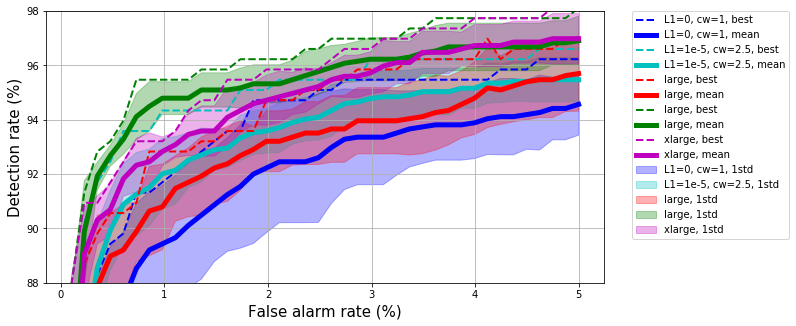

In [11]:
plt.figure(figsize=(10,5))

def pplot(a, c, l):
    mean = a.mean(axis=0)
    std = a.std(axis=0)
    best = a.max(axis=0)
    plt.plot(far, best, '--', c=c, label=l + ', best', linewidth=2)
    plt.plot(far, mean, c=c, label=l + ', mean', linewidth=5)
    plt.fill_between(far, mean - std, mean + std, alpha=0.3, color=c, label=l + ', 1std')
    
    
pplot(dr_0, 'b', 'L1=0, cw=1')
# pplot(dr_1, 'g', 'L1=1e-5, cw=1')
# pplot(dr_l, 'r', 'L1=1e-5, cw=2')
pplot(dr_cw, 'c', 'L1=1e-5, cw=2.5')
pplot(dr_lr_large, 'r', 'large')
pplot(dr_gru, 'g', 'large')
pplot(dr_lrg, 'm', 'xlarge')
# pplot(dr_lr, 'black', "L1=1e-5, cw=2.5, lr=3e-3")
# pplot(dr_lr_cw, 'm', "cwlong")
# pplot(dr_lr_cw2e, 'c', 'lr=5e-4, cw=2')

plt.ylim(88, 98)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("Detection rate (%)", fontsize=15)
plt.xlabel("False alarm rate (%)", fontsize=15)
plt.grid(True)

In [42]:
!ls -1 logs/fit/RETAIN_HDDcw/*/valid_roc_curve/raw.pkl

logs/fit/RETAIN_HDDcw/20191122-181553/valid_roc_curve/raw.pkl
logs/fit/RETAIN_HDDcw/20191123-044301/valid_roc_curve/raw.pkl
logs/fit/RETAIN_HDDcw/20191123-172219/valid_roc_curve/raw.pkl
logs/fit/RETAIN_HDDcw/20191123-201011/valid_roc_curve/raw.pkl
logs/fit/RETAIN_HDDcw/20191123-201123/valid_roc_curve/raw.pkl
logs/fit/RETAIN_HDDcw/20191123-201130/valid_roc_curve/raw.pkl


In [48]:
dr_cw[:,7]

array([94.33962264, 90.18867925, 92.0754717 , 90.94339623, 92.0754717 ,
       92.45283019])

In [32]:
raw_heats = !ls -1 logs/fit/RETAIN_HDDcw/*/heatmaps/raw.pkl
raw_heats

['logs/fit/RETAIN_HDDcw/20191122-181553/heatmaps/raw.pkl',
 'logs/fit/RETAIN_HDDcw/20191123-044301/heatmaps/raw.pkl',
 'logs/fit/RETAIN_HDDcw/20191123-172219/heatmaps/raw.pkl',
 'logs/fit/RETAIN_HDDcw/20191123-201011/heatmaps/raw.pkl',
 'logs/fit/RETAIN_HDDcw/20191123-201123/heatmaps/raw.pkl',
 'logs/fit/RETAIN_HDDcw/20191123-201130/heatmaps/raw.pkl']

In [33]:
data_heaps = [(i, pickle.load(open(raw, 'rb'))) for raw, i in zip(raw_heats, ids)]

In [34]:
def plotmat(mat, title=''):
    
#     sns.set(font_scale=1.7, style='whitegrid')
#     mat = np.abs(mat)
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d', facecolor='white')

    labelsf =[      "TLB Written",
                    "TLB Read",
                    "Load Cycle Count",
                    "Power On Hours",
                    "Temp",
                    "Seek Count",
        ]
    
    def cc(arg, pos=True):
        if pos: alpha = 0.9
        else: alpha = 0.3
        return mcolors.to_rgba(arg, alpha=alpha)

    xs = np.arange(0, mat.shape[0])
    verts = []
    k = mat.shape[1] -1
    zs = np.arange(0, k)
    for z in zs:
        ys = np.copy(mat[:, z+1])
        ys[0] = 0
        ys[-1] = 0
        
        ypos = np.copy(ys)
        ypos[ypos < 0] = 0
        yneg = np.copy(ys)
        yneg[yneg > 0] = 0 
        
        verts.append(list(zip(xs, np.abs(ypos))))
        verts.append(list(zip(xs, np.abs(yneg))))
        
    zs = np.repeat(zs, 2)

    poly = PolyCollection(verts, facecolors=[ cc('g'), cc('g', False), cc('b'), cc('b', False),
                                             cc('y'), cc('y', False), cc('c'), cc('c', False), 
                                             cc('black'), cc('black', False), cc('r'), cc('r', False)])
    ax.add_collection3d(poly, zs=zs, zdir='y')
    
    
    ax.set_title(title)
    ax.set_xlabel('Days in advance', weight='bold')
    ax.set_xlim3d(0, mat.shape[0])
    ax.set_ylim3d(0, k)
#     ax.set_yticklabels(labels)
    ax.set_zlabel('Feature contribution', weight='bold')
    ax.set_zlim3d(0, np.abs(mat).max())
    

    for i,c in enumerate(['g', 'b', 'y', 'c', 'black', 'r']):
        ax.get_yticklabels()[i].set_color(c)
    
    fig.canvas.draw()
    
    ax.set_yticklabels(labelsf,rotation=-15,
                   verticalalignment='baseline',
                   fontweight='bold',
                   horizontalalignment='left')
    
    ax.set_zticklabels([item.get_text() for item in ax.get_zticklabels()],rotation=-15,
                   verticalalignment='baseline',
                   horizontalalignment='left')

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'today'
    labels = ['', *labels[:-1]]
    ax.set_xticklabels(labels[::-1])
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    ax.zaxis.labelpad=-40
    ax.xaxis.labelpad=25
    

    
    plt.show()

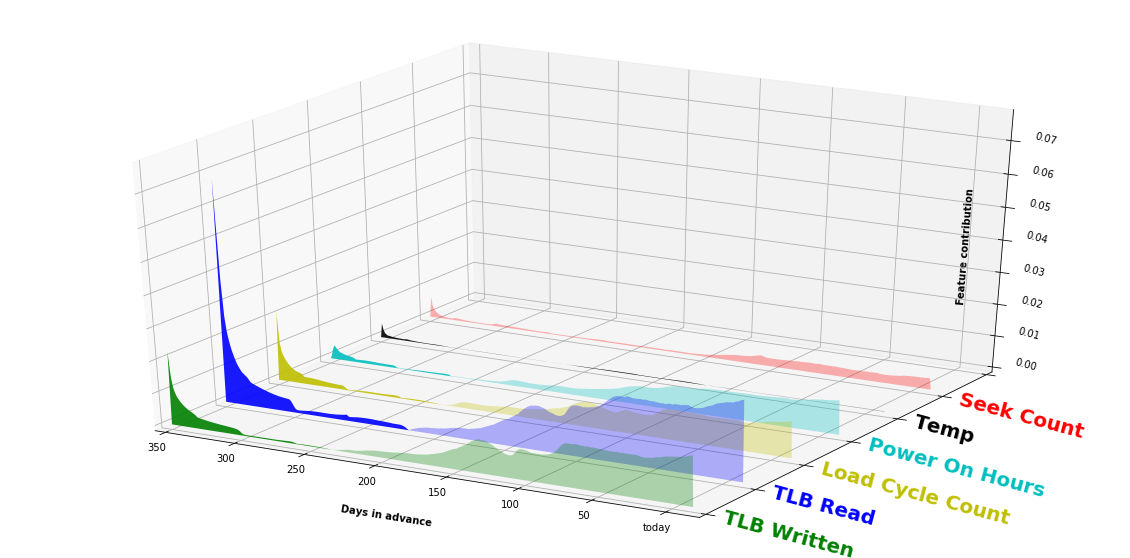

In [35]:
_idx = 6
mats = np.array([raw["total_contribution"][_idx] for i, raw in data_heaps])
plotmat(mats.mean(axis=0))

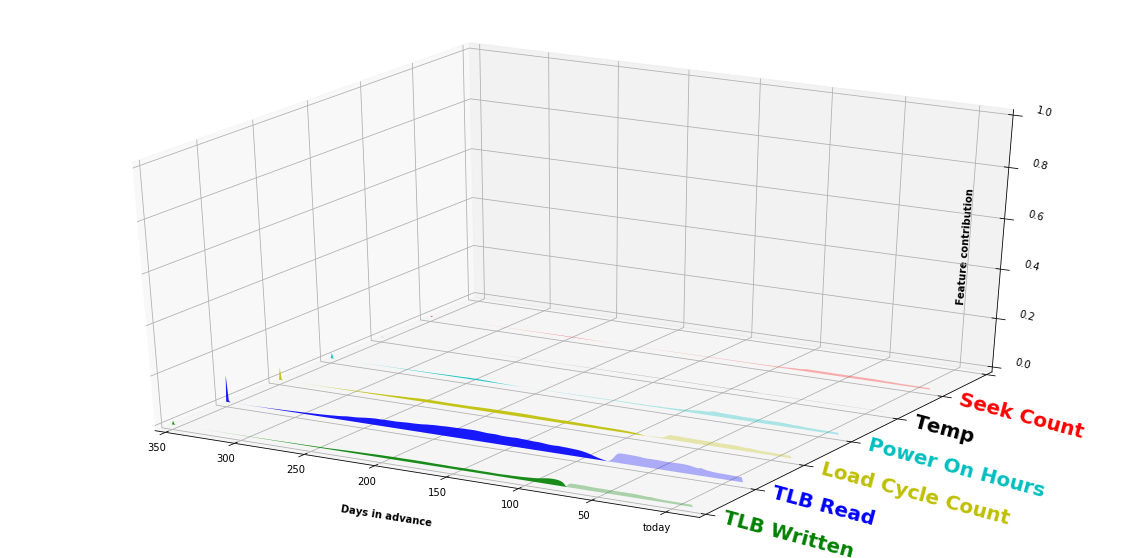

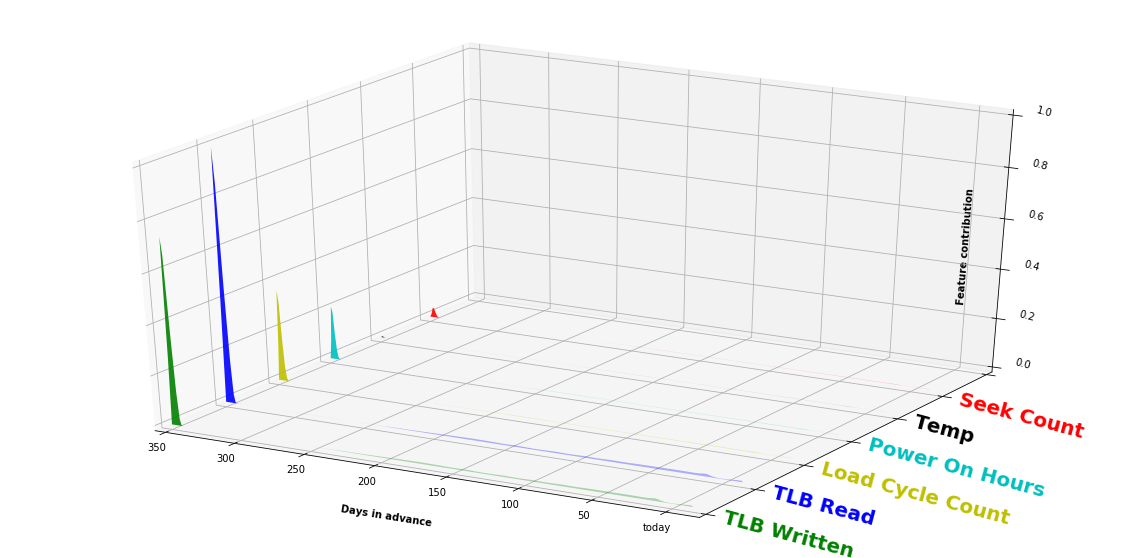

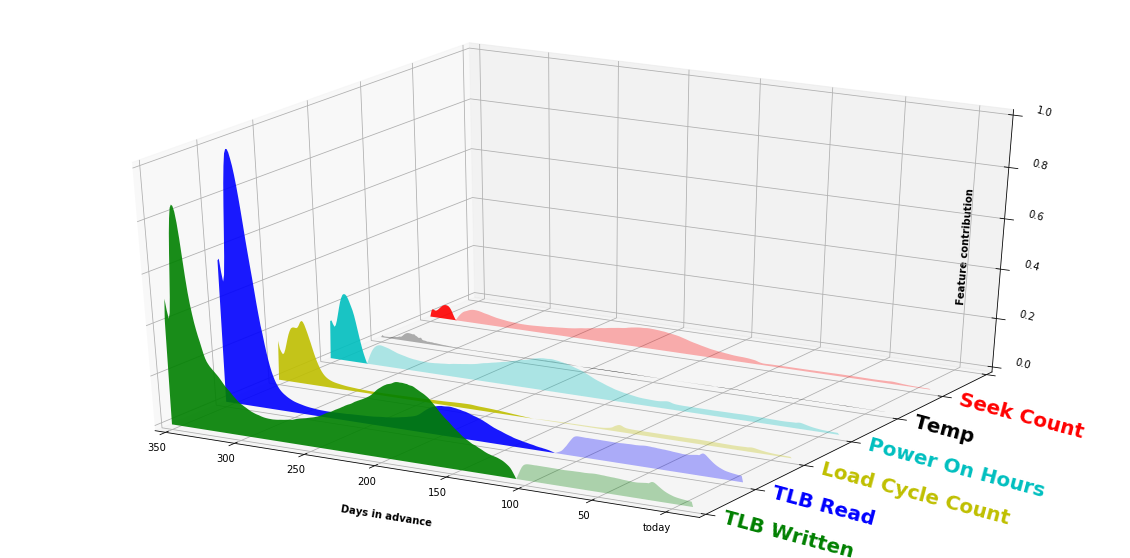

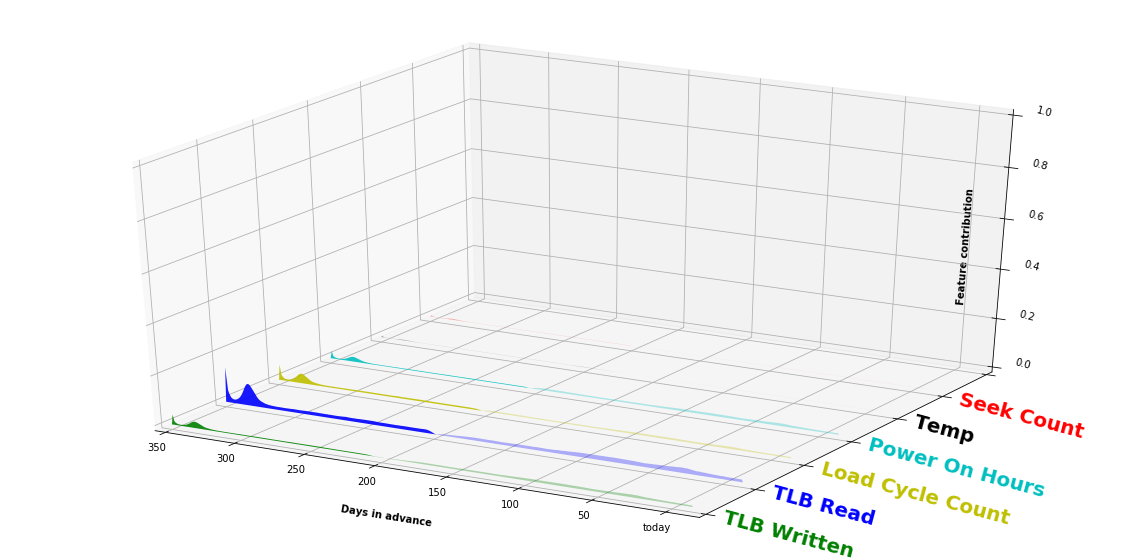

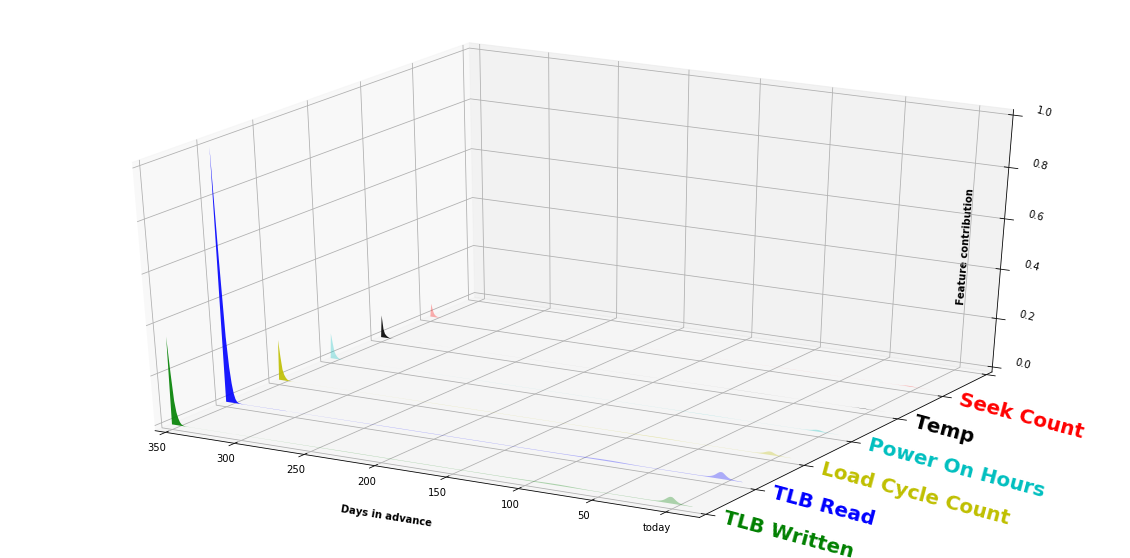

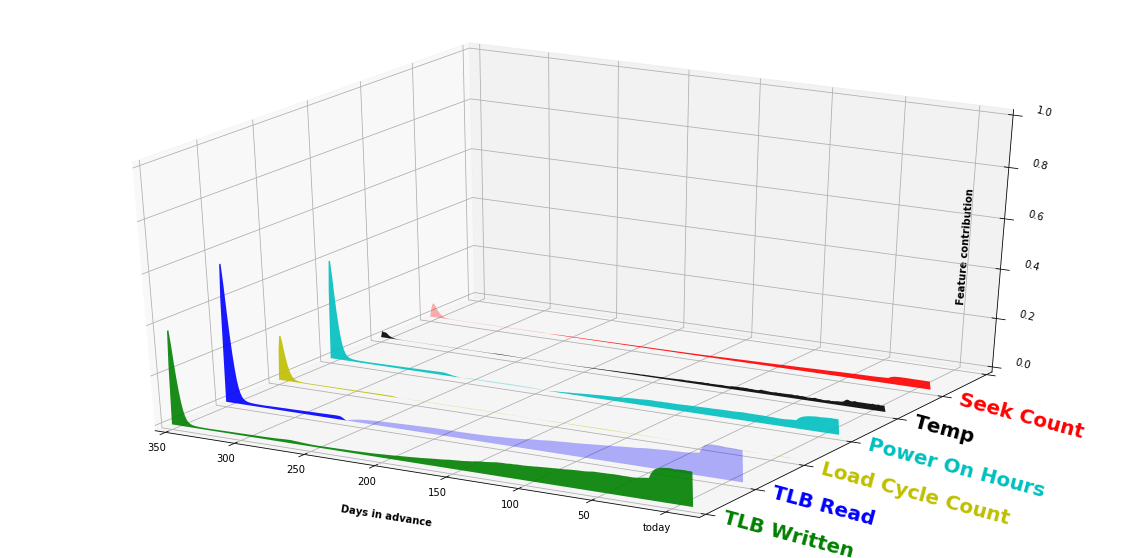

c=3040


In [47]:
centroids = [3040, 3560, 3458]

for c in centroids[0:1]:
    mats = np.array([raw["total_contribution"][c] for i, raw in data_heaps])
    for mat in mats:
        plotmat(mat / np.max(np.abs(mat)))
    print(f"c={c}")

In [37]:
all_mats = np.array([np.array([r for r in raw["total_contribution"] if r.shape[0] == 365]) for _, raw in data_heaps])

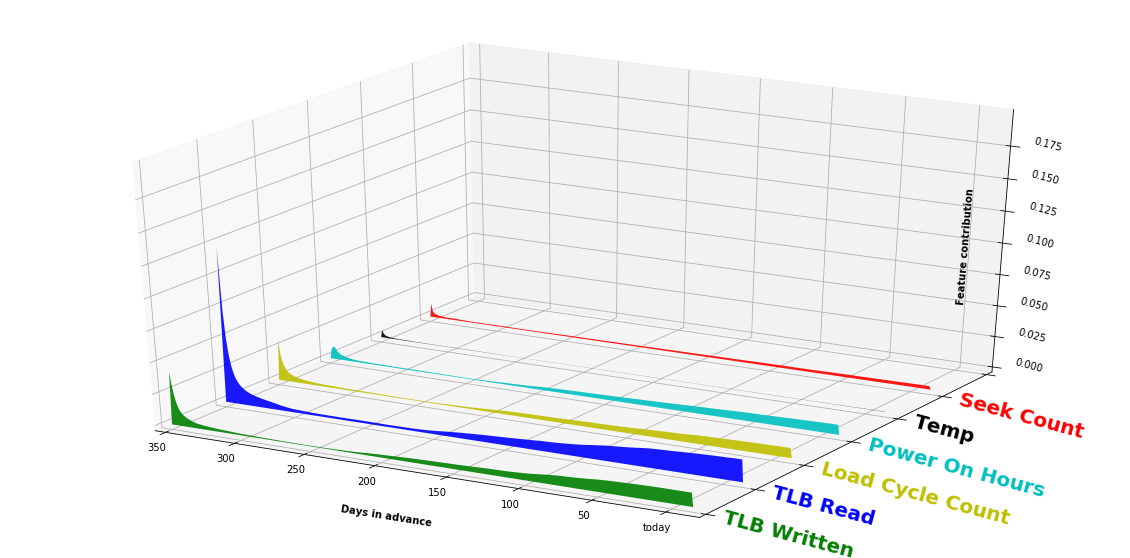

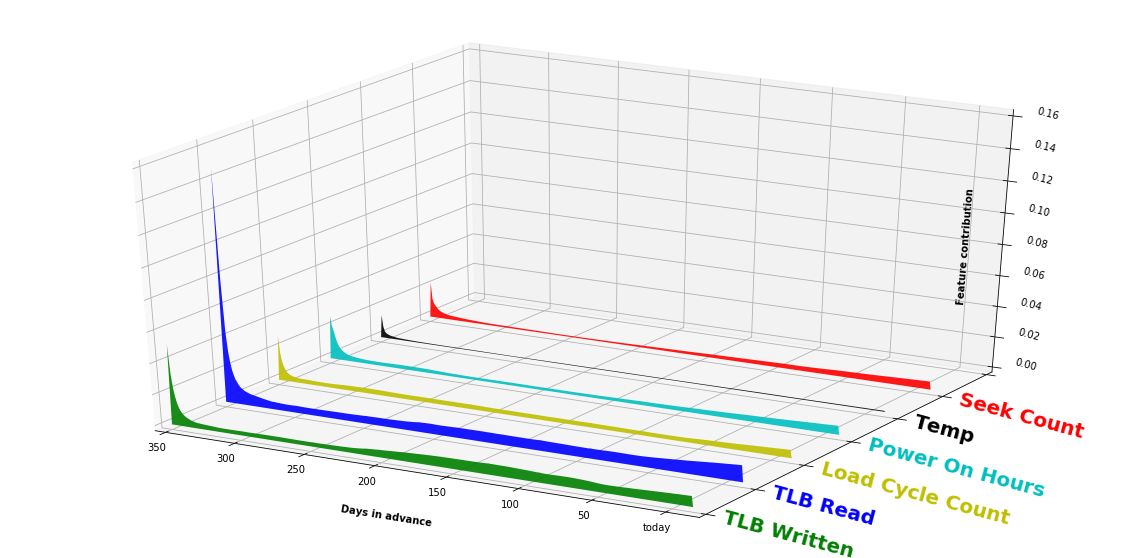

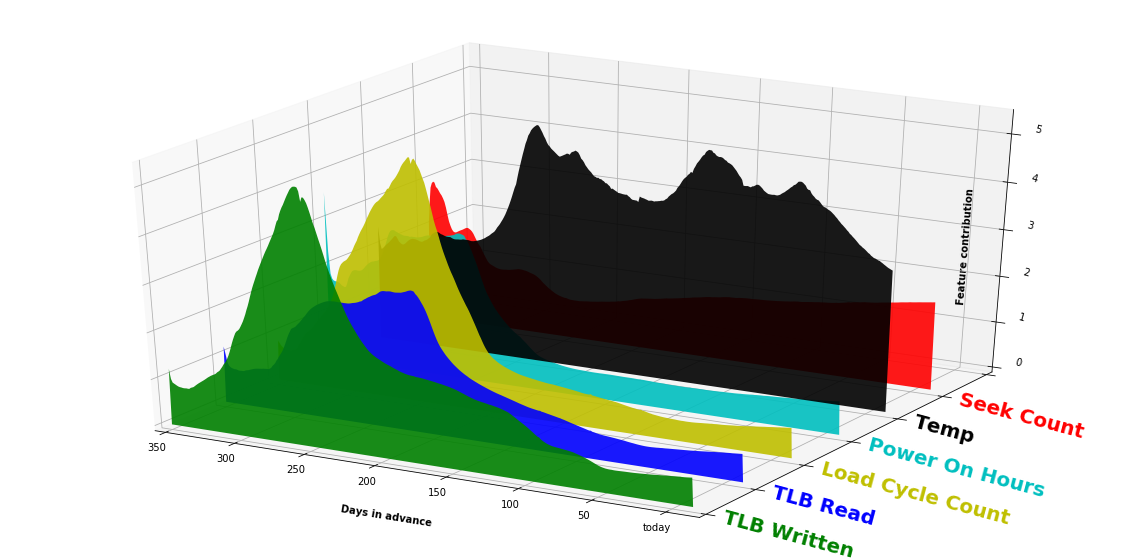

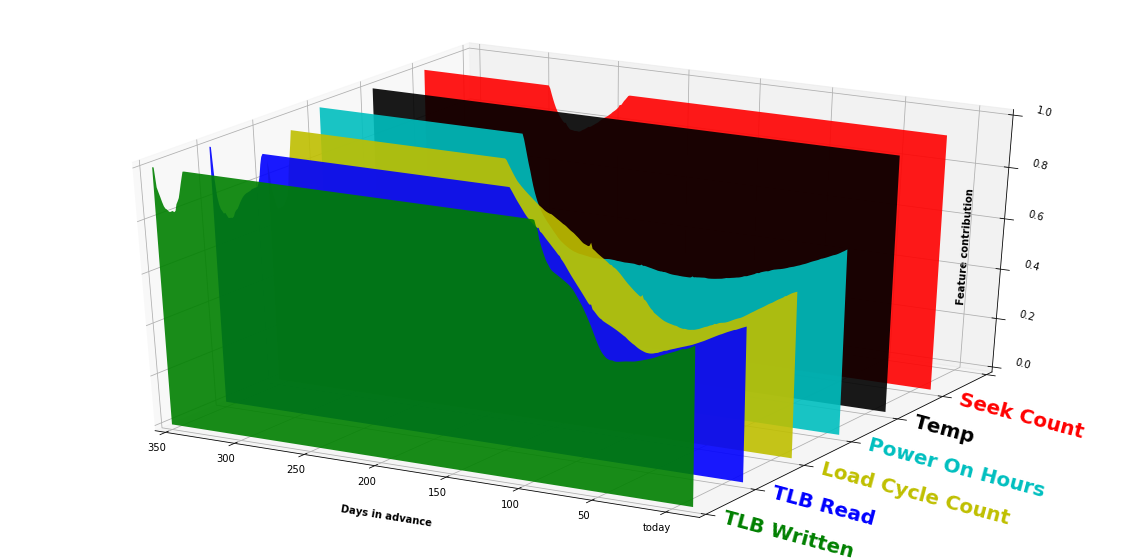

In [38]:
avg = np.abs(all_mats.mean(axis=0)).mean(axis=0)
std_avg = np.abs(all_mats.std(axis=0)).mean(axis=0)

ratio = np.abs(std_avg / avg)
plotmat(avg)
plotmat(std_avg)
plotmat(ratio)
ratio[ratio > 1] = 1
plotmat(ratio)

In [16]:
all_mats = np.array([np.array([r for r in raw["total_contribution"] if r.shape[0] == 365]) for i, raw in data_heaps if "_1" in i])

In [39]:
import numpy as np
from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util
import matplotlib.pyplot as plt

path = "/home/abalak8/temporal_model_visualization/logs/fit/RETAIN_HDDcw2//*/{validation_roc,train_roc}/*"

files = !ls {path} -1

In [40]:
vals = []
for file in files:
    aggr = []
    for event in summary_iterator(file):
        for value in event.summary.value:
            t = tensor_util.MakeNdarray(value.tensor)
            aggr.append(t)
    vals.append(aggr)
vals = np.array(vals)
vals.shape

(12, 301)

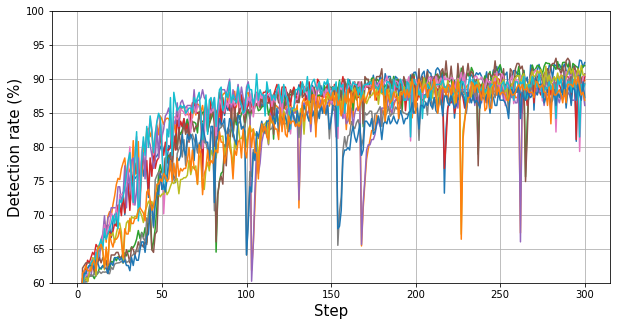

In [41]:
plt.figure(figsize=(10,5))

for v in vals:
    plt.plot(v * 100)
    
    
plt.ylim(60, 100)
plt.ylabel("Detection rate (%)", fontsize=15)
plt.xlabel("Step", fontsize=15)
plt.grid(True)